In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json", "r") as f:
        factscores = json.load(f)

atomic_fact_predictions = np.load("ckpts/sft_atomic_facts_llama7B/checkpoint_01000/hf_model/test_medium_samples_facts.npy", allow_pickle=True).item()
factualiaty_predictions = np.load("ckpts/rm2_atmoic_facts_llama7B/checkpoint_10000/hf_model/sft_atomic_facts_llama7B_ckpt_01000_factuality_preds.npy")


In [3]:
factualiaty_predictions = (factualiaty_predictions == " Yes.")

In [4]:
np.mean(factualiaty_predictions)

0.44938701681516713

In [5]:
num_true_all = []
num_total_all = []
skipped_idxs = []
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        skipped_idxs.append(i)
    else:
        num_total_all.append(len(decison))
        num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))

In [6]:
skipped_idxs

[]

In [20]:

pred_num_true_all = []
pred_num_total_all = []
for bio_idx in range(0, len(num_true_all)):
    fact_idxs = np.where(np.array(atomic_fact_predictions["bio_idxs"]) == bio_idx)[0]
    pred_num_total_all.append(len(fact_idxs))
    pred_num_true_all.append(np.sum(factualiaty_predictions[fact_idxs]))

In [33]:
num_true_all = np.array(num_true_all)
num_total_all = np.array(num_total_all)
pred_num_true_all = np.array(pred_num_true_all)
pred_num_total_all = np.array(pred_num_total_all)

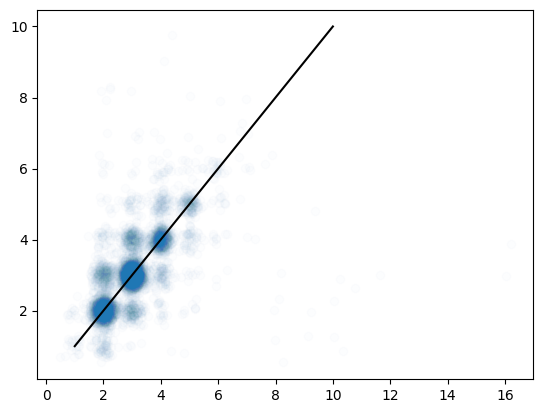

In [28]:
plt.scatter(pred_num_total_all+np.random.normal(0, 0.2, len(pred_num_total_all)), num_total_all+np.random.normal(0, 0.2, len(pred_num_total_all)), alpha=0.01)
plt.plot([1, 10], [1, 10], color="black")

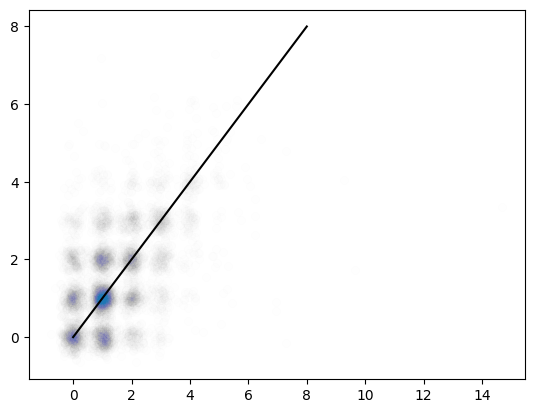

In [31]:
plt.scatter(pred_num_true_all+np.random.normal(0, 0.2, len(pred_num_total_all)), num_true_all+np.random.normal(0, 0.2, len(pred_num_total_all)), alpha=0.005)
plt.plot([0, 8], [0, 8], color="black")

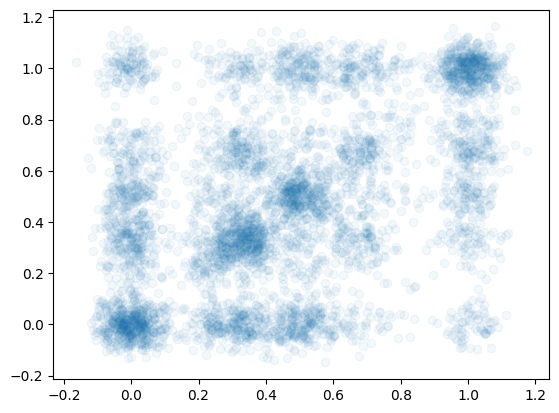

In [36]:
plt.scatter(pred_num_true_all/pred_num_total_all+np.random.normal(0, 0.05, len(pred_num_total_all)), num_true_all/num_total_all+np.random.normal(0, 0.05, len(pred_num_total_all)), alpha=0.05)


In [37]:
abs(pred_num_true_all/pred_num_total_all - num_true_all/num_total_all).mean()

0.24993465367965365

In [70]:
factualiaty_False_predictions = np.load("ckpts/rm2_atmoic_facts_llama7B/checkpoint_10000/hf_model/sft_atomic_facts_llama7B_ckpt_01000_False_factuality_preds.npy")
atomic_fact_False_predictions = np.load("ckpts/sft_atomic_facts_llama7B/checkpoint_01000/hf_model/test_medium_False_facts.npy", allow_pickle=True).item()
factualiaty_False_predictions = (factualiaty_False_predictions == " Yes.")

In [71]:

pred_num_true_all_False = []
pred_num_total_all_False = []
for bio_idx in range(0, (100)):
    fact_idxs = np.where(np.array(atomic_fact_False_predictions["bio_idxs"]) == bio_idx)[0]
    pred_num_total_all_False.append(len(fact_idxs))
    pred_num_true_all_False.append(np.sum(factualiaty_False_predictions[fact_idxs]))

In [72]:
pred_num_true_all_False= np.array(pred_num_true_all_False)
pred_num_total_all_False = np.array(pred_num_total_all_False)

np.mean(pred_num_true_all_False/pred_num_total_all_False)

0.1458560606060606

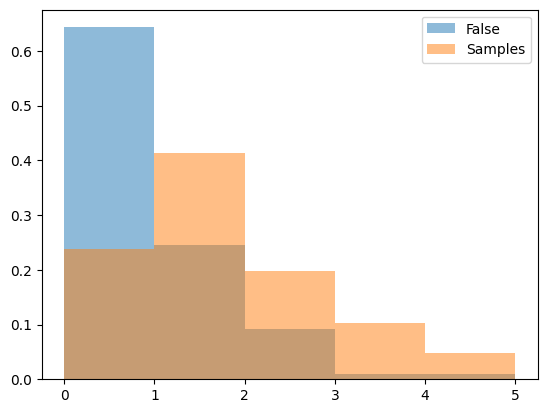

In [73]:
plt.hist(pred_num_true_all_False, density=True, alpha=0.5, label="False", bins=range(0, 6))
plt.hist(pred_num_true_all, density=True, alpha=0.5, label="Samples", bins=range(0, 6))

plt.legend()

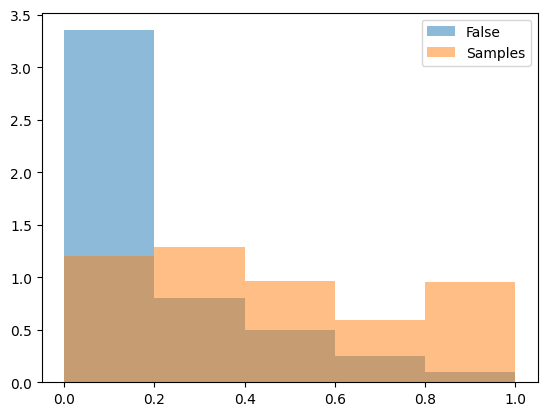

In [77]:
plt.hist(pred_num_true_all_False/pred_num_total_all_False, density=True, alpha=0.5, label="False", bins=[0, 0.2, 0.4, 0.6, 0.8, 1])
plt.hist(pred_num_true_all/pred_num_total_all, density=True, alpha=0.5, label="Samples", bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

plt.legend()